In [9]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [10]:
# get all files from the data/ folder and concatenate them into a single dataframe
# we dont know the file names, so we use the glob module to get all files
files = glob.glob('data/*.csv')
dfs = [pd.read_csv(f) for f in files]
df = pd.concat(dfs)
df.columns

Index(['transaction_index', 'value', 'gas', 'gas_price', 'block_number'], dtype='object')

In [11]:
df

,transaction_index,value,gas,gas_price,block_number
0,0,0,73182,17415907336,21276418
1,58,5942052318682433,21000,8291243148,21276418
2,178,436100000000000000,200000,7425907336,21276418
3,13,0,288356,9493637080,21276418
4,169,7515000179409980,22000,7726382080,21276418
...,...,...,...,...,...
164073,86,0,94584,8056301484,21277169
164074,74,3225600000000000,21000,7263684357,21277179
164075,71,0,121088,8601899956,21277183
164076,156,868841517824999,21000,6912308675,21277183


In [12]:
block_number = len(df['block_number'].unique())
print(f"Number of blocks: {block_number}")
print(f"Total time: {block_number*13 / (60 * 60)} hours")

Number of blocks: 2988
Total time: 10.79 hours


In [13]:
# group by block_number column, i want the list of gas_price for each block_number
block_gas_prices = df.groupby('block_number')['gas_price'].apply(list)

In [14]:
def plot_hist(block_gas_prices, index):
    block_prices = block_gas_prices.iloc[index]
    block_number = block_gas_prices.index[index]
    plt.hist(block_prices, bins=1000, color='blue', edgecolor='black', density=True)
    plt.title('Gas Price Probability Distribution of Block ' + str(block_number))
    plt.xlabel('Gas Price')
    plt.ylabel('Probability Density')
    plt.show()

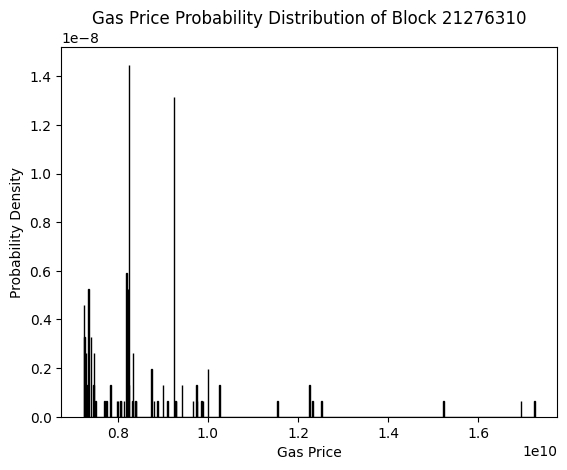

In [15]:
plot_hist(block_gas_prices, 888)

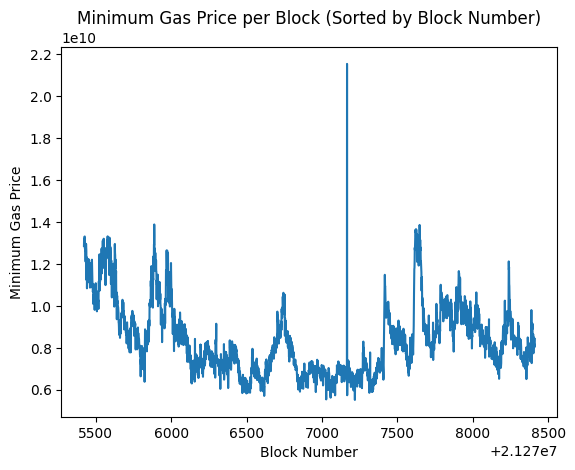

In [17]:
# give the minimum gas price for each block and plot it, sort by block number ascending
min_gas_prices = block_gas_prices.apply(min).sort_index()
plt.plot(min_gas_prices)
plt.title('Minimum Gas Price per Block (Sorted by Block Number)')
plt.xlabel('Block Number')
plt.ylabel('Minimum Gas Price')
plt.show()

In [18]:
min_gas_prices

block_number
21275422    12867195510
21275423    13163674888
21275424    13001608879
21275425    12968538854
21275426    13294173569
               ...     
21278407     8175315267
21278408     8030333273
21278409     8025665241
21278410     8056054823
21278411     8418888656
Name: gas_price, Length: 2988, dtype: int64